#**TASK 3**

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("IMDb Movies India.csv", encoding= "latin1")

In [3]:
df.shape

(15509, 10)

In [4]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
df = df.dropna(subset=['Rating'])

In [12]:
df = df.copy()

In [13]:
df['Genre'] = df['Genre'].fillna('Unknown')
df['Director'] = df['Director'].fillna('Unknown')
df['Actor 1'] = df['Actor 1'].fillna('Unknown')
df['Actor 2'] = df['Actor 2'].fillna('Unknown')
df['Actor 3'] = df['Actor 3'].fillna('Unknown')
df['Votes'] = df['Votes'].fillna(0)


In [14]:
df['Year'] = df['Year'].str.replace('(', '').str.replace(')', '')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')


In [15]:
df['Duration'] = df['Duration'].str.replace(' min', '')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')


In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Genre_enc'] = encoder.fit_transform(df['Genre'])
df['Director_enc'] = encoder.fit_transform(df['Director'])
df['Actor1_enc'] = encoder.fit_transform(df['Actor 1'])
df['Actor2_enc'] = encoder.fit_transform(df['Actor 2'])
df['Actor3_enc'] = encoder.fit_transform(df['Actor 3'])


In [17]:
features = ['Year', 'Duration', 'Votes', 
            'Genre_enc', 'Director_enc', 
            'Actor1_enc', 'Actor2_enc', 'Actor3_enc']

X = df[features]
y = df['Rating']


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
df['Votes'] = df['Votes'].astype(str).str.replace(',', '')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'] = df['Votes'].fillna(0)


In [21]:
df['Duration'] = df['Duration'].astype(str).str.replace(' min', '')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')


In [22]:
df['Year'] = df['Year'].astype(str).str.replace('(', '').str.replace(')', '')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')


In [23]:
df[features].dtypes


Year              int64
Duration        float64
Votes             int64
Genre_enc         int64
Director_enc      int64
Actor1_enc        int64
Actor2_enc        int64
Actor3_enc        int64
dtype: object

In [25]:
df = df.copy()

In [26]:
df['Votes'] = df['Votes'].astype(str)
df['Votes'] = df['Votes'].str.replace(',', '', regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'] = df['Votes'].fillna(0)


In [27]:
df['Duration'] = df['Duration'].astype(str)
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')


In [28]:
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.replace('(', '', regex=False).str.replace(')', '', regex=False)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')


In [29]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Genre_enc'] = encoder.fit_transform(df['Genre'].astype(str))
df['Director_enc'] = encoder.fit_transform(df['Director'].astype(str))
df['Actor1_enc'] = encoder.fit_transform(df['Actor 1'].astype(str))
df['Actor2_enc'] = encoder.fit_transform(df['Actor 2'].astype(str))
df['Actor3_enc'] = encoder.fit_transform(df['Actor 3'].astype(str))


In [30]:
features = [
    'Year', 'Duration', 'Votes',
    'Genre_enc', 'Director_enc',
    'Actor1_enc', 'Actor2_enc', 'Actor3_enc'
]

X = df[features]
y = df['Rating']


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [32]:
print(X_train.dtypes)


Year              int64
Duration        float64
Votes             int64
Genre_enc         int64
Director_enc      int64
Actor1_enc        int64
Actor2_enc        int64
Actor3_enc        int64
dtype: object


In [34]:
for col in X.columns:
    print(col, X[col].dtype)


Year int64
Duration float64
Votes int64
Genre_enc int64
Director_enc int64
Actor1_enc int64
Actor2_enc int64
Actor3_enc int64


In [36]:
df = df.copy()

df['Year'] = df['Year'].fillna(df['Year'].median())
df['Duration'] = df['Duration'].fillna(df['Duration'].median())
df['Votes'] = df['Votes'].fillna(0)

# Encoded columns (safety)
df['Genre_enc'] = df['Genre_enc'].fillna(df['Genre_enc'].mode()[0])
df['Director_enc'] = df['Director_enc'].fillna(df['Director_enc'].mode()[0])
df['Actor1_enc'] = df['Actor1_enc'].fillna(df['Actor1_enc'].mode()[0])
df['Actor2_enc'] = df['Actor2_enc'].fillna(df['Actor2_enc'].mode()[0])
df['Actor3_enc'] = df['Actor3_enc'].fillna(df['Actor3_enc'].mode()[0])


In [37]:
X = df[features]
print(X.isnull().sum())


Year            0
Duration        0
Votes           0
Genre_enc       0
Director_enc    0
Actor1_enc      0
Actor2_enc      0
Actor3_enc      0
dtype: int64


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X = df[features]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 1.0312466227047659
R2 Score: 0.1006649041433183


In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, rf_pred))
print("R2 Score:", r2_score(y_test, rf_pred))


MAE: 0.832241792929293
R2 Score: 0.34813355003354796


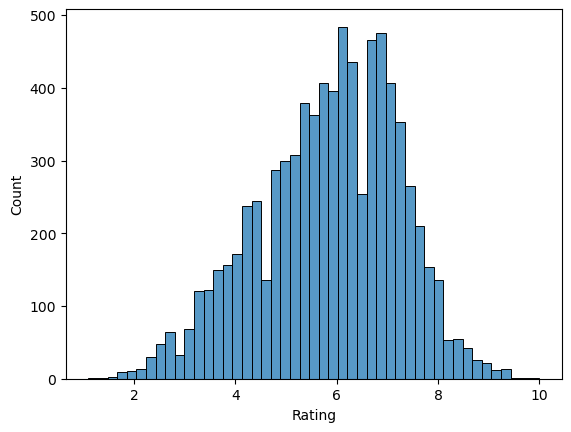

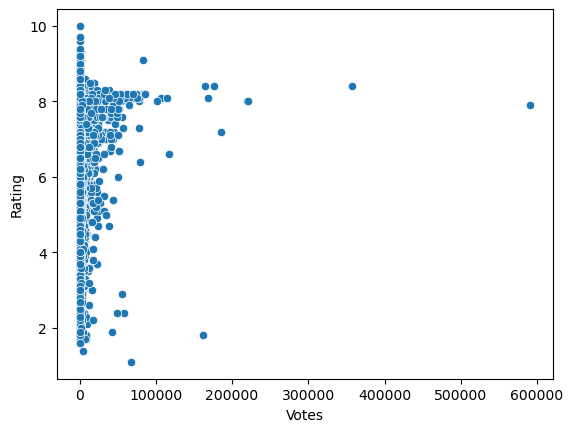

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Rating'])
plt.show()

sns.scatterplot(x='Votes', y='Rating', data=df)
plt.show()
